In [4]:
#%%
# Imports
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import numpy as np
import pandas 
import os
import time
import cv2
#%%
Datas = 'Fer2013/'
Dataset = []
Folders = ['train', 'test']
CATEGORIES = ['angry','disgust','fear','happy','neutral','sad','surprise']
#%%
# We now need to rearrange data. We split it between two set, one that will
# be used for training, and one that will allow us to test the model.

In [5]:
Datas = 'Fer2013/'
Train_set, Test_set = [], []
Folders = ['train', 'test']
Categories = ['angry','disgust','fear','happy','neutral','sad','surprise']
for folder in Folders:
        for category in Categories : 
            if (category == "angry"):
                a = [1,0,0,0,0,0,0]
            if (category == "disgust"):
                a = [0,1,0,0,0,0,0]
            if (category == "fear"):
                a = [0,0,1,0,0,0,0]
            if (category == "happy"):
                a = [0,0,0,1,0,0,0]
            if (category == "neutral"):
                a = [0,0,0,0,1,0,0]
            if (category == "sad"):
                a = [0,0,0,0,0,1,0]
            if(category == "surprise"):
                a = [0,0,0,0,0,0,1]
            PATH = os.path.join(Datas, folder)
            PATH = os.path.join(PATH,category)
            for el in os.listdir(PATH):
                img = cv2.imread(os.path.join(PATH,el),0)
                if (folder == 'train'):
                    Train_set.append([img, a])
                if (folder == 'test'):
                    Test_set.append([img, a])

KeyboardInterrupt: 

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = [] 

for el in Train_set : 
    X_train.append(el[0])
    y_train.append(el[1])
for el in Test_set : 
    X_test.append(el[0])
    y_test.append(el[1])
X_train = np.array(X_train).reshape(-1, 48,48,1)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, 48, 48, 1)
y_test = np.array(y_test)

In [ ]:
X_train.shape

In [ ]:
#Normaliser les données (X-Xmin)/(Xmax-Xmin)
#On a des photos en niveaux de gris --> Les valeurs s'étendent de 0 à 255

X_train = #a compléter
X_test = #a compléter

In [ ]:
#Nos données sont actuellement sous la forme d'un tableau de taille (nb_images, img_height, img_width, 1)
#Puisqu'on va commencer par un simple réseau de neurones dense, il faut convertir et flatten les images en (nb_images, img_height*img_width*1)
#On veut garder les images sous la première forme pour notre réseau convolutif tout à l'heure. Définissons juste une fonction flatten qui renvoie une version "applatie" des images

def flatten(X):
    
    # a compléter

In [ ]:
a = flatten(X_train)
print(a.shape)

In [ ]:
model = Sequential ()
model.add(Dense(1200, input_dim=, activation=''))
model.add(Dense(600, activation = ''))
model.add(Dense(200, activation = ''))
model.add(Dense(100, activation = ''))
model.add(Dense( "a compléter",activation = ''))

In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
call_list = [keras.callbacks.EarlyStopping(patience = 5)] #jai rajouté ça, le truc regarde le val_loss et la val_accuracy
NB_epochs = 10
BATCH_size = 100
history = model.fit(flatten(X_train),
                    y_train,
                    validation_data=(flatten(X_test), y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

In [ ]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)


In [12]:
#Définissons maintenant notre model convolutif


model = Sequential()

model.add(Conv2D(, (),padding = 'same', activation = '', input_shape = )) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(, (),activation = '' ,padding='')) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(, (),activation = '' ,padding = '')) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(, activation = '')) #a compléter
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(, activation = '')) #a compléter
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense()) #a compléter
model.add(Activation('')) #a compléter


In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [14]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 10)]
NB_epochs = 10
BATCH_size = 32
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/10
898/898 [==============================] - 11s 10ms/step - loss: 1.8040 - accuracy: 0.3228 - val_loss: 1.7282 - val_accuracy: 0.3505
Epoch 2/10
898/898 [==============================] - 9s 10ms/step - loss: 1.4412 - accuracy: 0.4423 - val_loss: 1.7423 - val_accuracy: 0.3833
Epoch 3/10
898/898 [==============================] - 10s 11ms/step - loss: 1.3267 - accuracy: 0.4918 - val_loss: 1.2754 - val_accuracy: 0.5109
Epoch 4/10
898/898 [==============================] - 10s 11ms/step - loss: 1.2644 - accuracy: 0.5187 - val_loss: 1.2661 - val_accuracy: 0.5162
Epoch 5/10
898/898 [==============================] - 9s 10ms/step - loss: 1.2096 - accuracy: 0.5404 - val_loss: 1.2676 - val_accuracy: 0.5230
Epoch 6/10
898/898 [==============================] - 8s 9ms/step - loss: 1.1823 - accuracy: 0.5544 - val_loss: 1.2382 - val_accuracy: 0.5244
Epoch 7/10
898/898 [==============================] - 8s 9ms/step - loss: 1.1367 - accuracy: 0.5712 - val_loss: 1.4210 - val_accuracy: 0.481

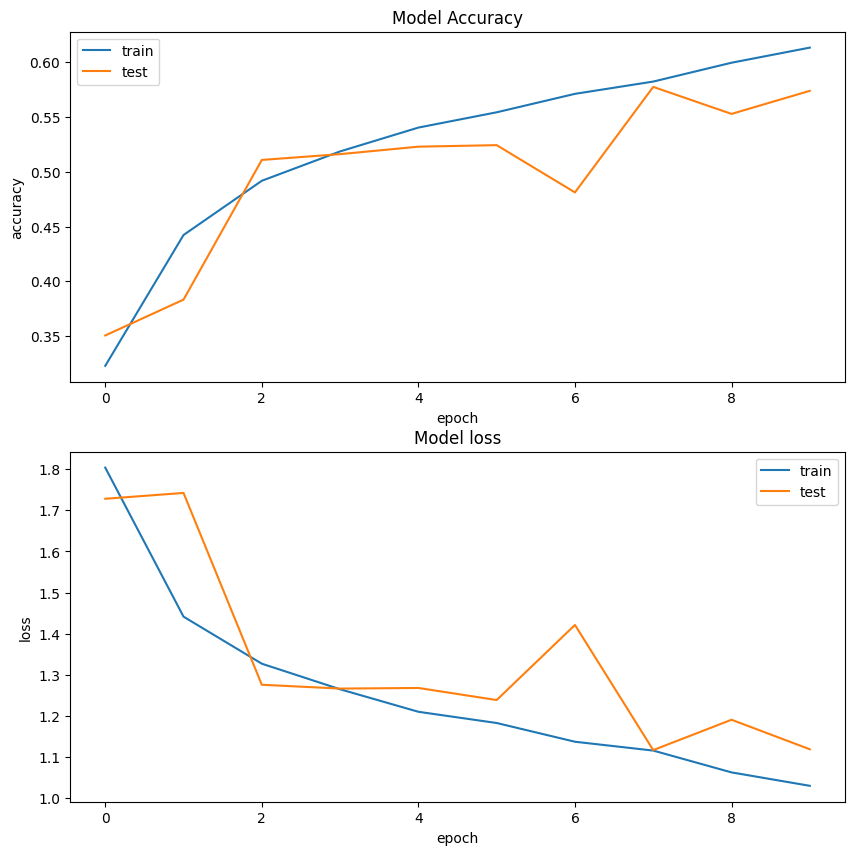

In [15]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)

In [1]:
#On peut maintenant tenter d'améliorer nos résultats grâce à la data-augmentation. Pour cela, il faut d'abord réinitialiser le modèle.
#Vous pouvez copier-coller celui que vous avez défini précedemment ou compléter avec de nouvelles valeurs

model = Sequential()

model.add(Conv2D(, (),padding = 'same', activation = '', input_shape = )) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(, (),activation = '' ,padding='')) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(, (),activation = '' ,padding = '')) #a compléter
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(, activation = '')) #a compléter
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(, activation = '')) #a compléter
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense()) #a compléter
model.add(Activation('')) #a compléter


SyntaxError: invalid syntax (3679047762.py, line 6)

In [21]:
#On défini ici les transfos appliquables sur les images

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 5,
                                         width_shift_range = 0.15,
                                         height_shift_range = 0.15,
                                         horizontal_flip = True,
                   
                                         zoom_range = 0.15,
                                         )

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [23]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 10)]
NB_epochs = 25
BATCH_size = 32

history = model.fit(x = datagen.flow(X_train, y_train, batch_size=BATCH_size),
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/10
898/898 [==============================] - 10s 10ms/step - loss: 1.9581 - accuracy: 0.2369 - val_loss: 1.7129 - val_accuracy: 0.3175
Epoch 2/10
898/898 [==============================] - 9s 10ms/step - loss: 1.7097 - accuracy: 0.3187 - val_loss: 1.7002 - val_accuracy: 0.3553
Epoch 3/10
898/898 [==============================] - 10s 11ms/step - loss: 1.5860 - accuracy: 0.3797 - val_loss: 1.4955 - val_accuracy: 0.4175
Epoch 4/10
898/898 [==============================] - 9s 10ms/step - loss: 1.5022 - accuracy: 0.4188 - val_loss: 1.4305 - val_accuracy: 0.4510
Epoch 5/10
898/898 [==============================] - 9s 10ms/step - loss: 1.4566 - accuracy: 0.4370 - val_loss: 1.3585 - val_accuracy: 0.4727
Epoch 6/10
898/898 [==============================] - 11s 12ms/step - loss: 1.4097 - accuracy: 0.4563 - val_loss: 1.6283 - val_accuracy: 0.3941
Epoch 7/10
898/898 [==============================] - 12s 14ms/step - loss: 1.3828 - accuracy: 0.4696 - val_loss: 1.2391 - val_accuracy: 0.

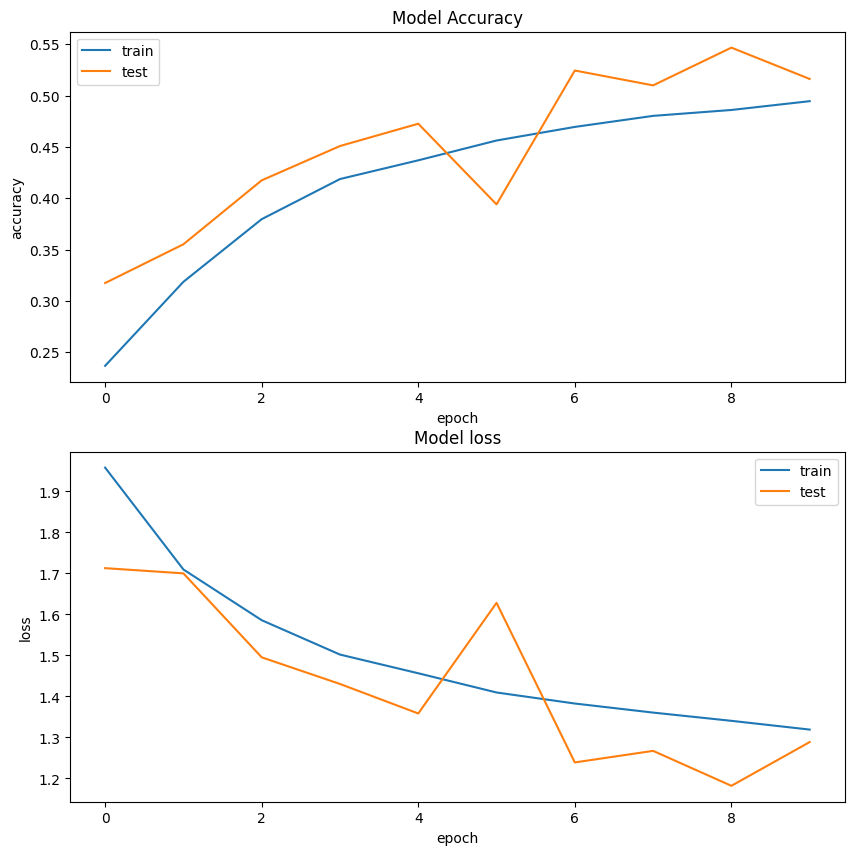

In [25]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)

In [26]:
Y_pred = model.predict(X_test)

225/225 [==============================] - 1s 4ms/step


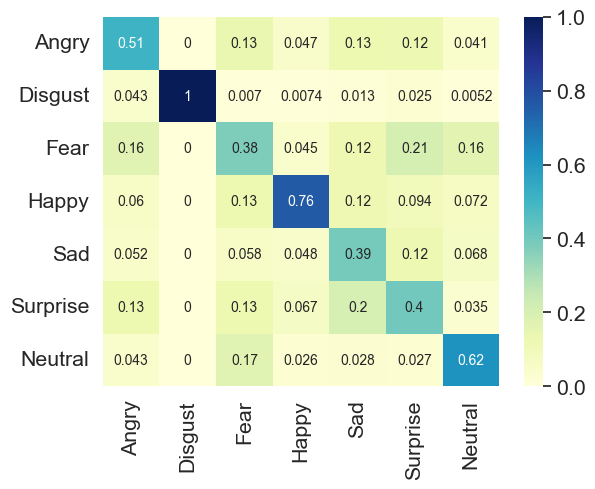

In [28]:
# On peut réaliser la matrice de confusion pour voir si le modèle fonctionne bien

import seaborn as sn
matrix = confusion_matrix(y_test.argmax(axis=1), Y_pred.argmax(axis=1),normalize = 'pred')
confuse = pd.DataFrame(matrix, ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"] , ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]) #range(matrix.shape[0])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confuse, cmap="YlGnBu", annot=True, annot_kws={"size": 10}) # font size

plt.show()

In [6]:
# Ici, voici un petit code pour prédire vos propres photos
# Pour le lancer, vous avez juste à placer votre image dans le même dossier que le notebook et à mettre son nom 
# avec l'extension en argument de la fonction

def prediction(img):
    
    img = cv2.imread(img,0)
    img = cv2.resize(img,(48,48))
    #plt.imshow(img)
    img = img.reshape(1,48,48,1)
    a = np.argmax(model.predict(img))
    if(a==0):
        print('Angry')
    elif(a==1):
        print('Disgust')
    elif(a==2):
        print('Fear')
    elif(a==3):
        print ('Happy')
    elif(a==4):
        print('Sad')
    elif(a==5):
        print('Surprise')
    elif(a==6):
        print('Neutral')
    

    

In [7]:
prediction('img')

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
